In [ ]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import re

def count_keywords(title, keywords_df):
    title_lower = title.lower()

    for index, row in keywords_df.iterrows():
        keyword = row['키워드'].lower()
        # 정규 표현식을 사용하여 단어 경계를 확인
        if re.search(r'\b' + re.escape(keyword) + r'\b', title_lower):
            # 해당 키워드의 빈도수를 1 증가
            keywords_df.at[index, '빈도'] += 1

In [ ]:
def processing_stackcount(file_path, keyword_df):
    temp_df = pd.read_excel(file_path)
    # 각 제목에 대해 count_keywords 함수 적용
    temp_df['서명'].apply(lambda title: count_keywords(title, keyword_df))

In [ ]:
years = range(2018, 2024)  # 연도 범위
months = range(1, 13)  # 월 범위


keyword_df = pd.read_excel("/content/drive/MyDrive/대출 데이터 모음/키워드 처리 폴더/개발 키워드_원본.xlsx")


# 각 연도별 데이터 폴더를 순회
base_path = '/content/drive/MyDrive/대출 데이터 모음/키워드 처리 폴더/'
for year in years:
    year_folder_path = os.path.join(base_path, str(year))
    if os.path.exists(year_folder_path):
        for month in months:
            file_name = f"{year}_{month}_keyword_processed.xlsx"
            file_path = os.path.join(year_folder_path, file_name)
            if os.path.exists(file_path):
                # filtering_datarow(file_path, year, month)
                processing_stackcount(file_path, keyword_df)
            else:
                print(f"File not found: {file_path}")
    else:
        print(f"Year folder not found: {year_folder_path}")

keyword_df.to_excel("/content/drive/MyDrive/대출 데이터 모음/키워드 처리 폴더/개발 키워드_revised.xlsx")

File not found: /content/drive/MyDrive/대출 데이터 모음/키워드 처리 폴더/2023/2023_11_keyword_processed.xlsx
File not found: /content/drive/MyDrive/대출 데이터 모음/키워드 처리 폴더/2023/2023_12_keyword_processed.xlsx


In [ ]:
data_df = pd.read_excel("/content/drive/MyDrive/대출 데이터 모음/키워드 처리 폴더/개발 키워드_revised.xlsx")

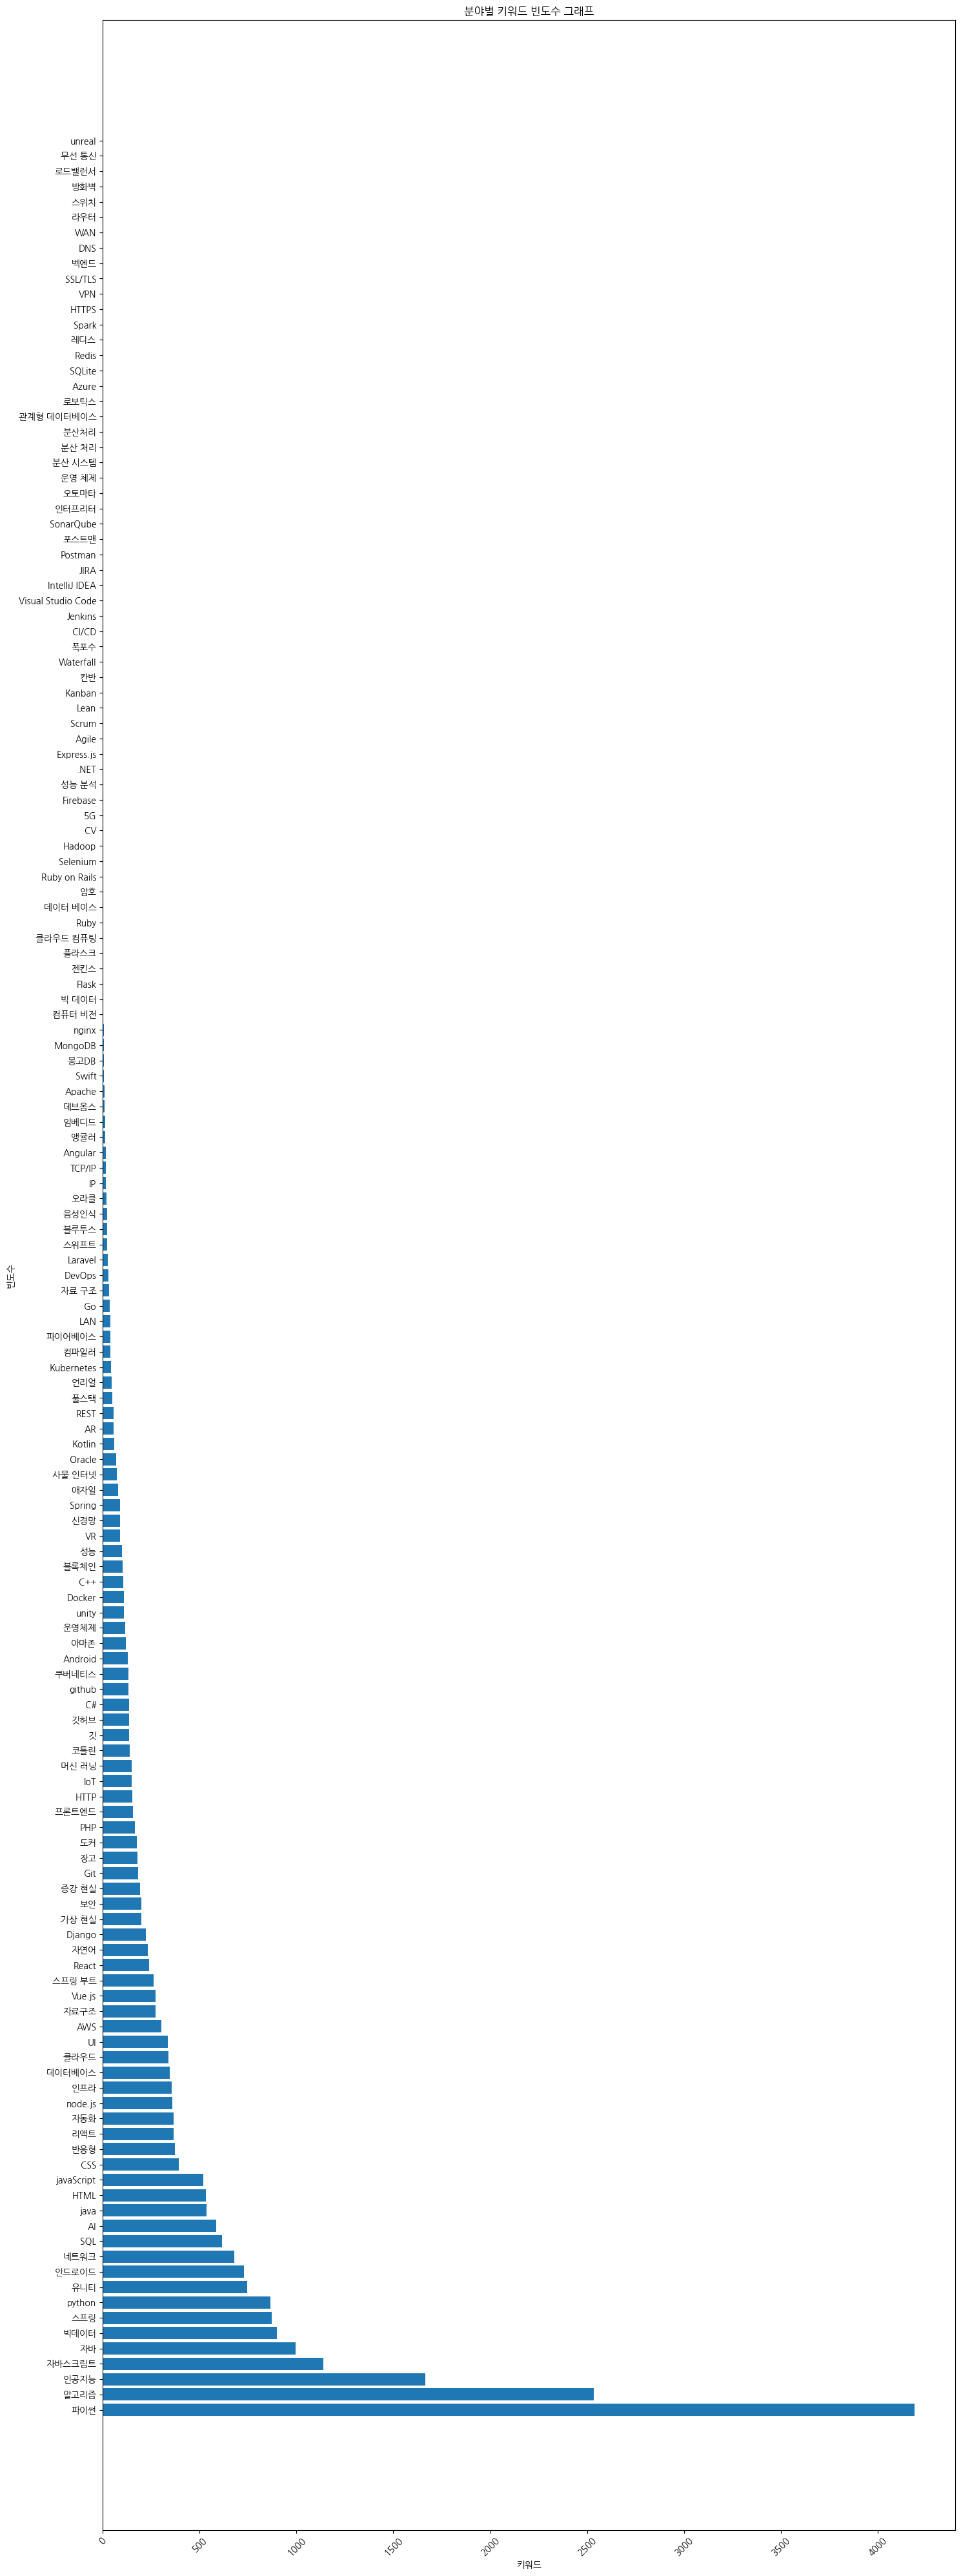

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
# 그래프 생성
plt.figure(figsize=(15, 40))
plt.barh(data_df['키워드'], data_df['빈도'])
plt.xticks(rotation=45)
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.title('분야별 키워드 빈도수 그래프')
plt.tight_layout()

# 그래프 표시
plt.show()

In [ ]:
keyword_df123 = pd.read_excel("/content/drive/MyDrive/대출 데이터 모음/키워드 처리 폴더/개발 키워드_원본.xlsx")
count_keywords("자바스크립트 분석", keyword_df123)

In [ ]:
keyword_df123

,키워드,빈도
0,파이썬,0
1,알고리즘,0
2,자바,0
3,인공지능,0
4,AR,0
...,...,...
145,스위치,0
146,방화벽,0
147,로드밸런서,0
148,무선 통신,0


In [ ]:
print(keyword_df123)

        키워드  빈도
0       파이썬   0
1      알고리즘   0
2        자바   0
3      인공지능   0
4        AR   0
..      ...  ..
145     스위치   0
146     방화벽   0
147   로드밸런서   0
148   무선 통신   0
149  unreal   0

[150 rows x 2 columns]
